<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Maharashtra/shivsenaMaharashtra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
!git clone https://github.com/raishagun/Election-Prediction.git

fatal: destination path 'Election-Prediction' already exists and is not an empty directory.


In [112]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"shivsena maharashtra"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('shivsena_maharashtra.csv',index = False)

Streaming output truncated to the last 5000 lines.
<--------------------------------------------------->
104
2020-11-19 10:43:00
1329374611918573568
False
@mataonline @Dev_Fadnavis @BJP4Maharashtra @fadnavis_amruta @ShivSena @rautsanjay61 Maharashtra is very clean Amruthaji please clean your eyes and mind against Maharashtra
Singhthefighter
India
Twitter Web App
7
225
1386
0
<--------------------------------------------------->
105
2020-11-19 10:29:53
1329371309218746368
False
@GaikwadAnkur @Altroz654 @ANI When compared with Bihar, Maharashtra congress unfortunately is very strong.
NCP and shivsena can not survive if they go solo, so they need partner.
For NCP it will be either congress or Sena.
amol_20011987

Twitter Web App
3
59
247
0
<--------------------------------------------------->
106
2020-11-19 10:20:09
1329368859535568897
False
@rajesh_dce @ShivSena 1) Coalition Govt with Kashmiri separatists.
2) Crying "FOE" for Darnab in Maharashtra but jailing dozens of journalists in BJP

In [117]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       449 non-null    datetime64[ns]
 1   Tweet_id   449 non-null    int64         
 2   Verified   449 non-null    bool          
 3   Tweet      449 non-null    object        
 4   User       449 non-null    object        
 5   Location   449 non-null    object        
 6   Source     449 non-null    object        
 7   Likes      449 non-null    int64         
 8   Followers  449 non-null    int64         
 9   Following  449 non-null    int64         
 10  Retweets   449 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 35.6+ KB


In [119]:
df.shape

(449, 11)

In [120]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [121]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [122]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [123]:
df['Source'].value_counts()

Twitter for Android    287
Twitter Web App        103
Twitter for iPhone      52
TweetDeck                4
Twitter for iPad         2
SocialFlow               1
Name: Source, dtype: int64

In [124]:
df['Location'].nunique()

151

In [125]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

449

In [126]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


446

In [127]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [128]:
df['Tweet'].duplicated().sum()

3

In [129]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(446, 11)

In [130]:
df['Tweet'].duplicated().sum()

0

In [131]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [132]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [133]:
df.shape

(446, 12)

In [134]:
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1      @liberal_SR @ParagSMohite @niteshthakur9 @Deep...
2      @PawarSpeaks Sir u r d most powerful man in Ma...
3      @PawarSpeaks sir u r d most powerful man in Ma...
4      @Dev_Fadnavis after 30 years of misgovernece o...
                             ...                        
441    @KiritSomaiya @S97Nishu 🤣  Tiger  ka  Beta  Ch...
442    Shivsena + Congress and AIMIM + BJP\nImo it's ...
443    Biggest Hindu festival and @ShivSena kept Maha...
444    #MVA govt allows reopening of temples and othe...
445    @uddhavthackeray to stay CM for 5 years says @...
Name: Processed_Tweet, Length: 446, dtype: object

In [135]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1      @liberal_SR @ParagSMohite @niteshthakur9 @Deep...
2      @PawarSpeaks Sir u r d most powerful man in Ma...
3      @PawarSpeaks sir u r d most powerful man in Ma...
4      @Dev_Fadnavis after 30 years of misgovernece o...
                             ...                        
441    @KiritSomaiya @S97Nishu 🤣  Tiger  ka  Beta  Ch...
442    Shivsena + Congress and AIMIM + BJP\nImo it's ...
443    Biggest Hindu festival and @ShivSena kept Maha...
444    #MVA govt allows reopening of temples and othe...
445    @uddhavthackeray to stay CM for 5 years says @...
Name: Processed_Tweet, Length: 446, dtype: object

In [136]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1                      She has been arrested for quit...
2        Sir u r d most powerful man in Maharashtra&a...
3        sir u r d most powerful man in Maharashtra V...
4        after 30 years of misgovernece of Mumbai, #S...
                             ...                        
441        🤣  Tiger  ka  Beta  Chor 🤣\n\nUdhav Thacke...
442    Shivsena + Congress and AIMIM + BJP\nImo it's ...
443    Biggest Hindu festival and   kept Maharashtra ...
444    #MVA govt allows reopening of temples and othe...
445      to stay CM for 5 years says   MP   who slamm...
Name: Processed_Tweet, Length: 446, dtype: object

In [137]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1                      She has been arrested for quit...
2        Sir u r d most powerful man in Maharashtra&a...
3        sir u r d most powerful man in Maharashtra V...
4        after 30 years of misgovernece of Mumbai, #S...
                             ...                        
441        🤣  Tiger  ka  Beta  Chor 🤣\n\nUdhav Thacke...
442    Shivsena + Congress and AIMIM + BJP\nImo it's ...
443    Biggest Hindu festival and   kept Maharashtra ...
444    #MVA govt allows reopening of temples and othe...
445      to stay CM for 5 years says   MP   who slamm...
Name: Processed_Tweet, Length: 446, dtype: object

In [138]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1                      She has been arrested for quit...
2        Sir u r d most powerful man in Maharashtra&a...
3        sir u r d most powerful man in Maharashtra V...
4        after 30 years of misgovernece of Mumbai, Sh...
                             ...                        
441        🤣  Tiger  ka  Beta  Chor 🤣\n\nUdhav Thacke...
442    Shivsena + Congress and AIMIM + BJP\nImo it's ...
443    Biggest Hindu festival and   kept Maharashtra ...
444    MVA govt allows reopening of temples and other...
445      to stay CM for 5 years says   MP   who slamm...
Name: Processed_Tweet, Length: 446, dtype: object

In [139]:
!pip install tweet-preprocessor

In [140]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Shivsena is using the Secular way to rule Maha...
1      She has been arrested for quitting the party I...
2      Sir u r d most powerful man in Maharashtra&amp...
3      sir u r d most powerful man in Maharashtra V h...
4      after years of misgovernece of Mumbai, ShivSen...
                             ...                        
441    Tiger ka Beta Chor Udhav Thackeray is a corrup...
442    Shivsena + Congress and AIMIM + BJPImo it's go...
443    Biggest Hindu festival and kept Maharashtra te...
444    MVA govt allows reopening of temples and other...
445    to stay CM for years says MP who slammed for p...
Name: Processed_Tweet, Length: 446, dtype: object

In [141]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Shivsena is using the Secular way to rule Maha...
1      She has been arrested for quitting the party I...
2      Sir u r d most powerful man in Maharashtra amp...
3      sir u r d most powerful man in Maharashtra V h...
4      after years of misgovernece of Mumbai  ShivSen...
                             ...                        
441    Tiger ka Beta Chor Udhav Thackeray is a corrup...
442    Shivsena   Congress and AIMIM   BJPImo it s go...
443    Biggest Hindu festival and kept Maharashtra te...
444    MVA govt allows reopening of temples and other...
445    to stay CM for years says MP who slammed for p...
Name: Processed_Tweet, Length: 446, dtype: object

In [142]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      shivsena is using the secular way to rule maha...
1      she has been arrested for quitting the party i...
2      sir u r d most powerful man in maharashtra amp...
3      sir u r d most powerful man in maharashtra v h...
4      after years of misgovernece of mumbai  shivsen...
                             ...                        
441    tiger ka beta chor udhav thackeray is a corrup...
442    shivsena   congress and aimim   bjpimo it s go...
443    biggest hindu festival and kept maharashtra te...
444    mva govt allows reopening of temples and other...
445    to stay cm for years says mp who slammed for p...
Name: Processed_Tweet, Length: 446, dtype: object

In [143]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'on which planet u are leaving  here bjp mlas are joining ncp    shivsena chalo ur better understanding go    study present mla of bjp   their background half of them are from ncp or in maharashtra it s more about local leaders than party '

In [144]:
df['User'].value_counts()

rajnish1Midas      5
chavan_cm          5
WhiteAvocados      4
the_news_21        4
naashonomics       4
                  ..
SuketuK            1
Binod1048          1
God_n_Country_1    1
desipetergrifin    1
AshuSharma_        1
Name: User, Length: 387, dtype: int64

In [145]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


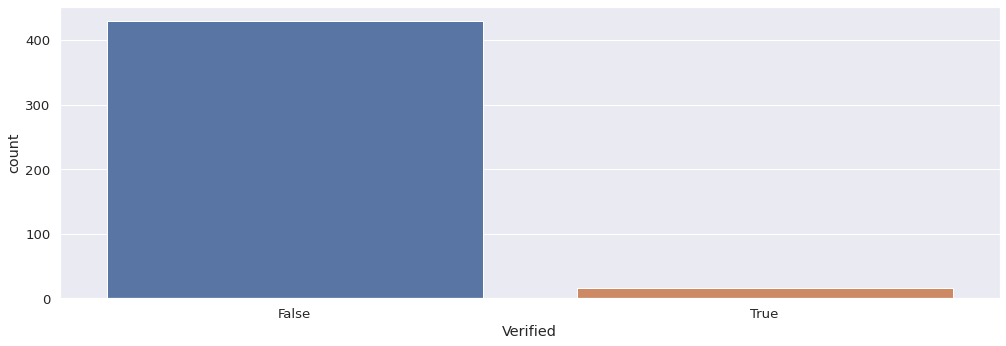

In [146]:
bar = sns.countplot(df['Verified'])

In [147]:
df['Verified'].value_counts()

False    430
True      16
Name: Verified, dtype: int64

In [148]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

Ms_Aflatoon        1
praful_patel       1
CatchNews          1
DevangVDave        1
the_hindu          1
priyankac19        1
MumbaiMirror       1
IndiaToday         1
AmitV_Deshmukh     1
ANI                1
moneycontrolcom    1
ashokepandit       1
latestly           1
TheQuint           1
firstpost          1
EconomicTimes      1
Name: User, dtype: int64

In [149]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 68, 16: 81, 17: 120, 18: 43, 19: 66, 20: 36, 21: 32})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

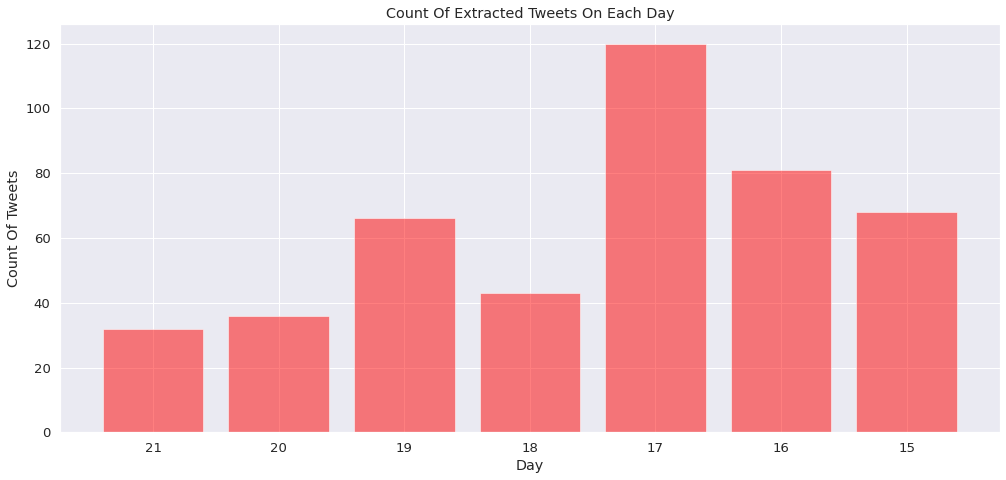

In [150]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [151]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 3,
         1: 9,
         2: 14,
         3: 16,
         4: 33,
         5: 30,
         6: 31,
         7: 33,
         8: 20,
         9: 30,
         10: 23,
         11: 21,
         12: 15,
         13: 31,
         14: 13,
         15: 26,
         16: 27,
         17: 35,
         18: 16,
         19: 9,
         20: 3,
         21: 4,
         22: 1,
         23: 3})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

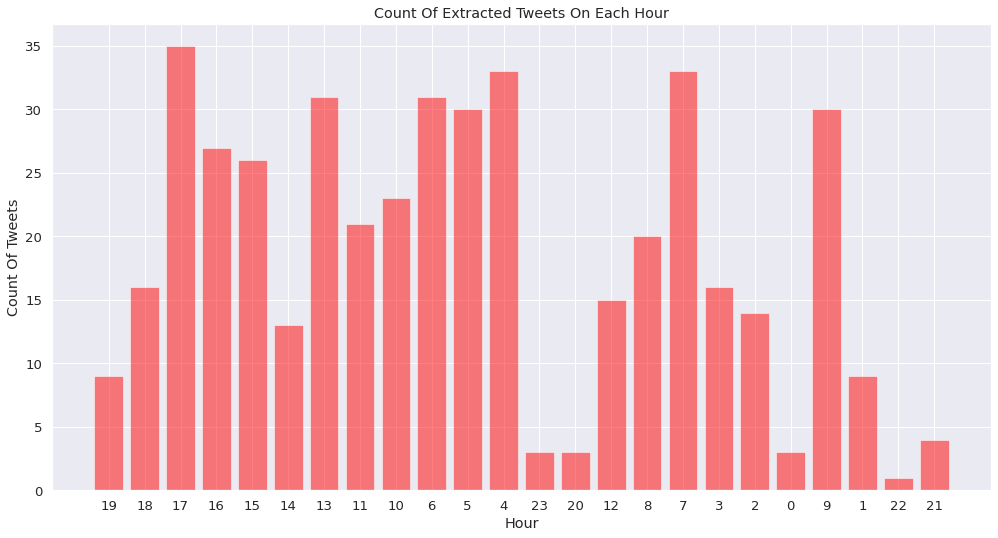

In [152]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [153]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [154]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [155]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['been', 'hasn', 'at', 'll', "won't", 'itself', 'from', "doesn't", 'be', 'my', 'me', 'should', 're', "shouldn't", 'further', 'they', 'your', 'have', 'an', 'same', 's', 't', 'won', 'am', 'with', 'very', 'but', "mustn't", 'more', 'the', 'our', 'yourself', 'as', "wouldn't", 'm', 'mustn', "needn't", 'aren', 'them', 'such', 'whom', 'how', 'just', 'don', 'does', 'did', "don't", "mightn't", 'or', 'there', 'no', "she's", 'then', 'she', 'below', 'to', 'only', 'not', 'until', 'is', 'theirs', "you're", 'against', "it's", "you'd", 'because', 'while', 'on', 'will', 'its', 'some', "wasn't", 'y', 'was', 'where', 'ain', 'under', 'wouldn', 'this', 'both', "haven't", 'and', 'nor', "couldn't", 'myself', 'through', 'those', "hadn't", 'wasn', 'd', 've', 'him', 'few', 'he', 'shouldn', 'above', 'than', 'hadn', 'isn', "didn't", 'during', 'by', 'their', 'her', 'yourselves', 'over', "hasn't", 'himself', 'his', 'having', 'out', 'hers', 'why', 'into', 'off', 'weren', 'i', "isn't", 'themselves', 'down', 'mightn', 

In [156]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      shivsena using secular way rule maharashtra lo...
1      arrested quitting party guess much impressed w...
2      sir u r powerful man maharashtra also looking ...
3      sir u r powerful man maharashtra v full hopes ...
4      years misgovernece mumbai shivsena restored ol...
                             ...                        
441    tiger ka beta chor udhav thackeray corrupt chi...
442    shivsena congress aimim bjpimo good happens ba...
443    biggest hindu festival kept maharashtra temple...
444    mva govt allows reopening temples places worsh...
445    stay cm years says mp slammed predicting fall ...
Name: Processed_Tweet, Length: 446, dtype: object

In [157]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [shivsena, using, secular, way, rule, maharash...
1      [arrested, quitting, party, guess, much, impre...
2      [sir, u, r, powerful, man, maharashtra, also, ...
3      [sir, u, r, powerful, man, maharashtra, v, ful...
4      [years, misgovernece, mumbai, shivsena, restor...
                             ...                        
441    [tiger, ka, beta, chor, udhav, thackeray, corr...
442    [shivsena, congress, aimim, bjpimo, good, happ...
443    [biggest, hindu, festival, kept, maharashtra, ...
444    [mva, govt, allows, reopening, temples, places...
445    [stay, cm, years, says, mp, slammed, predictin...
Name: Processed_Tweet, Length: 446, dtype: object

In [159]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [shivsena, use, secular, way, rule, maharashtr...
1      [arrest, quit, parti, guess, much, impress, wa...
2      [sir, u, r, power, man, maharashtra, also, loo...
3      [sir, u, r, power, man, maharashtra, v, full, ...
4      [year, misgovernec, mumbai, shivsena, restor, ...
                             ...                        
441    [tiger, ka, beta, chor, udhav, thackeray, corr...
442    [shivsena, congress, aimim, bjpimo, good, happ...
443    [biggest, hindu, festiv, kept, maharashtra, te...
444    [mva, govt, allow, reopen, templ, place, worsh...
445    [stay, cm, year, say, mp, slam, predict, fall,...
Name: Processed_Tweet, Length: 446, dtype: object

In [160]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 19:20:37,1330229648903581700,False,Shivsena is using the Secular way to rule Maha...,tAshutosh027,वसुधैव कुटुम्बकम्🌍,Twitter for Android,0,380,23,0,"[shivsena, use, secular, way, rule, maharashtr..."
1,2020-11-21 19:05:00,1330225718702305281,False,@liberal_SR @ParagSMohite @niteshthakur9 @Deep...,arman_parve,"Mumbai, India",Twitter for iPhone,0,804,639,0,"[arrest, quit, parti, guess, much, impress, wa..."
2,2020-11-21 18:54:30,1330223076454363143,False,@PawarSpeaks Sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,1,53,377,0,"[sir, power, man, maharashtra, also, look, dci..."
3,2020-11-21 18:40:15,1330219491347853313,False,@PawarSpeaks sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,0,53,377,0,"[sir, power, man, maharashtra, full, hope, dat..."
4,2020-11-21 17:52:40,1330207516907724803,False,@Dev_Fadnavis after 30 years of misgovernece o...,SuketuK,,Twitter for iPhone,0,218,152,0,"[year, misgovernec, mumbai, shivsena, restor, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
441,2020-11-15 03:59:55,1327823620043808768,False,@KiritSomaiya @S97Nishu 🤣😝 Tiger ka Beta C...,Deveshsinha12,"New Delhi, India",Twitter for Android,0,117,146,0,"[tiger, beta, chor, udhav, thackeray, corrupt,..."
442,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ..."
443,2020-11-15 03:15:12,1327812367640498183,False,Biggest Hindu festival and @ShivSena kept Maha...,Umeshcjoshi,New Delhi,Twitter for Android,1,126,199,0,"[biggest, hindu, festiv, kept, maharashtra, te..."
444,2020-11-15 02:17:43,1327797900865204224,False,#MVA govt allows reopening of temples and othe...,SanjayJog7,Thane,Twitter for Android,9,9854,4098,3,"[mva, govt, allow, reopen, templ, place, worsh..."


In [161]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

7012

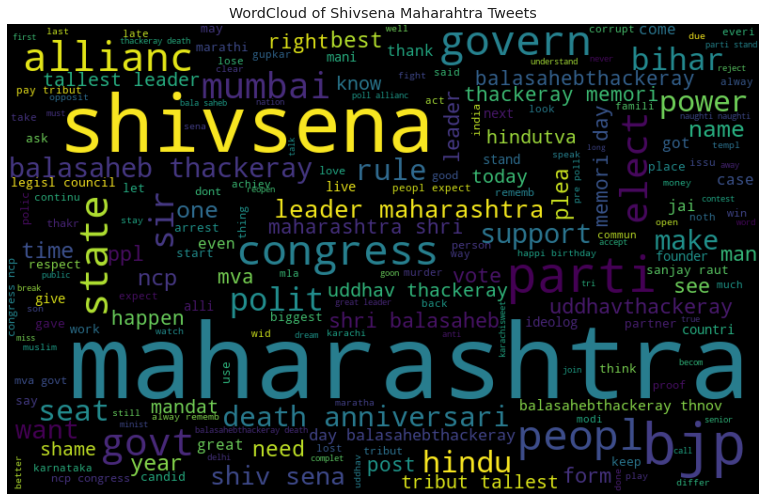

In [163]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Shivsena Maharahtra Tweets")
plt.show()

In [164]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

446

In [166]:
len(text)

7012

In [167]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 179
Negative Tweets: 58
Neutral Tweets 209


In [168]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [169]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

In [170]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,1.000,0.000,0.0000
1,0.137,0.514,0.349,0.5719
2,0.137,0.863,0.000,-0.5859
3,0.080,0.803,0.116,0.2263
4,0.047,0.709,0.244,0.7184
...,...,...,...,...
441,0.000,1.000,0.000,0.0000
442,0.000,0.671,0.329,0.6597
443,0.193,0.807,0.000,-0.4767
444,0.000,0.709,0.291,0.4767


In [171]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,1.000,0.000,0.0000,Neutral
1,0.137,0.514,0.349,0.5719,Positive
2,0.137,0.863,0.000,-0.5859,Negative
3,0.080,0.803,0.116,0.2263,Positive
4,0.047,0.709,0.244,0.7184,Positive


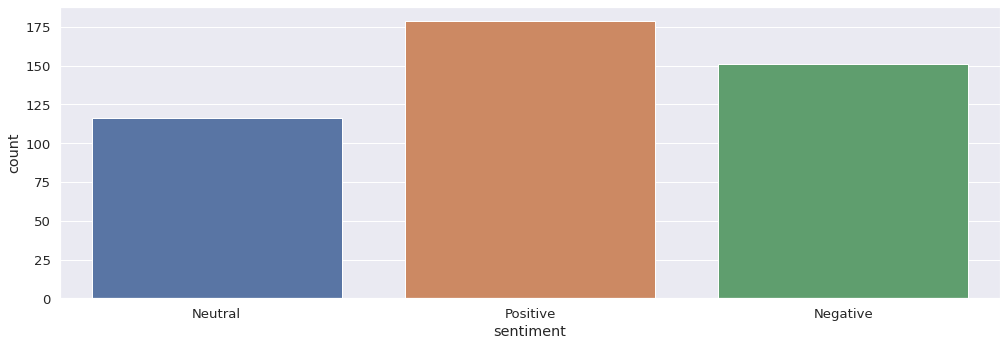

In [172]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [175]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Maharashtra/shivsena_maharashtra.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

938

In [176]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [178]:
word_emotion=dict()
for i in range(0,938):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [ ]:
from numpy import nan
nan == nan


False

In [179]:
for i in range(0,1202):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [180]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

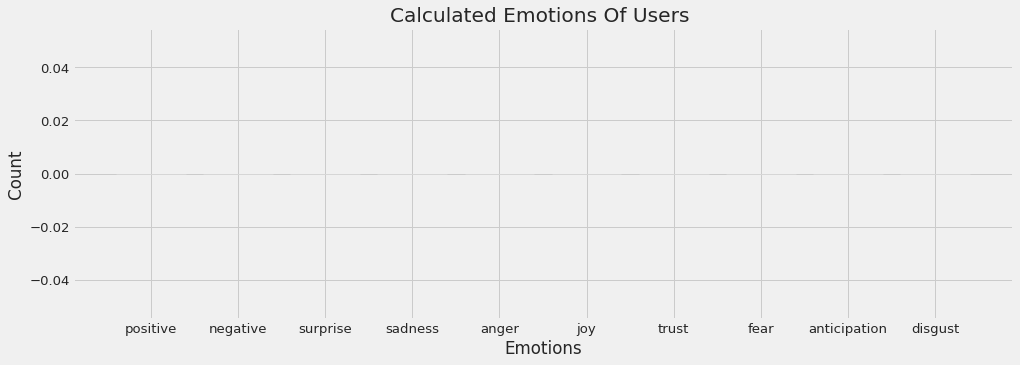

In [181]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [182]:
df.Location  = df.Location.fillna('INDIA')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [183]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                                135
India                            39
Mumbai, India                    32
Pune, India                      15
New Delhi, India                 14
                               ... 
संभाजीनगर-महाराष्ट्र              1
Tamil Nadu, India                 1
मूबंई(महाराष्ट्र(9922776998)      1
Sarva Bramhand                    1
Mysore, India                     1
Name: Location, Length: 151, dtype: int64

In [184]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 19:20:37,1330229648903581700,False,Shivsena is using the Secular way to rule Maha...,tAshutosh027,वसुधैव कुटुम्बकम्🌍,Twitter for Android,0,380,23,0,"[shivsena, use, secular, way, rule, maharashtr...",वसुधैव कुटुम्बकम्🌍
1,2020-11-21 19:05:00,1330225718702305281,False,@liberal_SR @ParagSMohite @niteshthakur9 @Deep...,arman_parve,"Mumbai, India",Twitter for iPhone,0,804,639,0,"[arrest, quit, parti, guess, much, impress, wa...",Mumbai
2,2020-11-21 18:54:30,1330223076454363143,False,@PawarSpeaks Sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,1,53,377,0,"[sir, power, man, maharashtra, also, look, dci...",Thane
3,2020-11-21 18:40:15,1330219491347853313,False,@PawarSpeaks sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,0,53,377,0,"[sir, power, man, maharashtra, full, hope, dat...",Thane
4,2020-11-21 17:52:40,1330207516907724803,False,@Dev_Fadnavis after 30 years of misgovernece o...,SuketuK,,Twitter for iPhone,0,218,152,0,"[year, misgovernec, mumbai, shivsena, restor, ...",
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2020-11-15 03:59:55,1327823620043808768,False,@KiritSomaiya @S97Nishu 🤣😝 Tiger ka Beta C...,Deveshsinha12,"New Delhi, India",Twitter for Android,0,117,146,0,"[tiger, beta, chor, udhav, thackeray, corrupt,...",New Delhi
442,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ...",India
443,2020-11-15 03:15:12,1327812367640498183,False,Biggest Hindu festival and @ShivSena kept Maha...,Umeshcjoshi,New Delhi,Twitter for Android,1,126,199,0,"[biggest, hindu, festiv, kept, maharashtra, te...",New Delhi
444,2020-11-15 02:17:43,1327797900865204224,False,#MVA govt allows reopening of temples and othe...,SanjayJog7,Thane,Twitter for Android,9,9854,4098,3,"[mva, govt, allow, reopen, templ, place, worsh...",Thane


In [185]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [186]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 19:20:37,1330229648903581700,False,Shivsena is using the Secular way to rule Maha...,tAshutosh027,वसुधैव कुटुम्बकम्🌍,Twitter for Android,0,380,23,0,"[shivsena, use, secular, way, rule, maharashtr...",वसुधैव कुटुम्बकम्🌍,Neutral,21
1,2020-11-21 19:05:00,1330225718702305281,False,@liberal_SR @ParagSMohite @niteshthakur9 @Deep...,arman_parve,"Mumbai, India",Twitter for iPhone,0,804,639,0,"[arrest, quit, parti, guess, much, impress, wa...",Mumbai,Positive,21
2,2020-11-21 18:54:30,1330223076454363143,False,@PawarSpeaks Sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,1,53,377,0,"[sir, power, man, maharashtra, also, look, dci...",Thane,Negative,21
3,2020-11-21 18:40:15,1330219491347853313,False,@PawarSpeaks sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,0,53,377,0,"[sir, power, man, maharashtra, full, hope, dat...",Thane,Positive,21
4,2020-11-21 17:52:40,1330207516907724803,False,@Dev_Fadnavis after 30 years of misgovernece o...,SuketuK,,Twitter for iPhone,0,218,152,0,"[year, misgovernec, mumbai, shivsena, restor, ...",,Positive,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


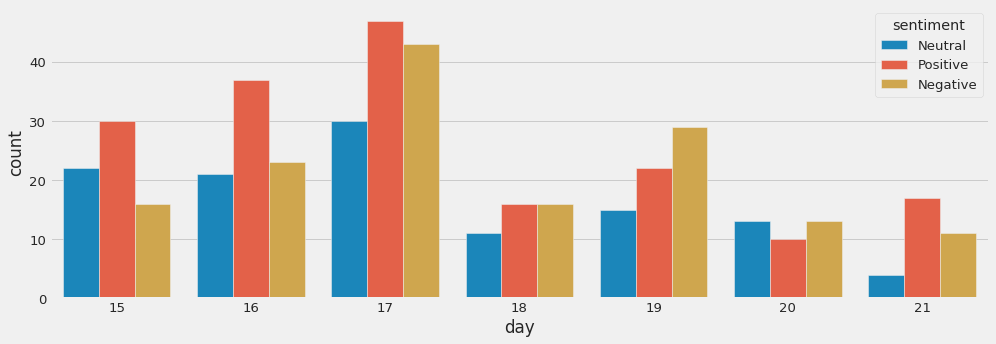

In [187]:
sns.countplot(df['day'],hue = df['sentiment'])

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [189]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 19:20:37,1330229648903581700,False,Shivsena is using the Secular way to rule Maha...,tAshutosh027,वसुधैव कुटुम्बकम्🌍,Twitter for Android,0,380,23,0,"[shivsena, use, secular, way, rule, maharashtr...",वसुधैव कुटुम्बकम्🌍,Neutral,21,1
1,2020-11-21 19:05:00,1330225718702305281,False,@liberal_SR @ParagSMohite @niteshthakur9 @Deep...,arman_parve,"Mumbai, India",Twitter for iPhone,0,804,639,0,"[arrest, quit, parti, guess, much, impress, wa...",Mumbai,Positive,21,2
2,2020-11-21 18:54:30,1330223076454363143,False,@PawarSpeaks Sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,1,53,377,0,"[sir, power, man, maharashtra, also, look, dci...",Thane,Negative,21,0
3,2020-11-21 18:40:15,1330219491347853313,False,@PawarSpeaks sir u r d most powerful man in Ma...,MVBH123456,"Thane, India",Twitter for Android,0,53,377,0,"[sir, power, man, maharashtra, full, hope, dat...",Thane,Positive,21,2
4,2020-11-21 17:52:40,1330207516907724803,False,@Dev_Fadnavis after 30 years of misgovernece o...,SuketuK,,Twitter for iPhone,0,218,152,0,"[year, misgovernec, mumbai, shivsena, restor, ...",,Positive,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,2020-11-15 03:59:55,1327823620043808768,False,@KiritSomaiya @S97Nishu 🤣😝 Tiger ka Beta C...,Deveshsinha12,"New Delhi, India",Twitter for Android,0,117,146,0,"[tiger, beta, chor, udhav, thackeray, corrupt,...",New Delhi,Neutral,15,1
442,2020-11-15 03:28:00,1327815586261262338,False,Shivsena + Congress and AIMIM + BJP\nImo it's ...,rajatgaur28,India,Twitter for Android,1,379,904,0,"[shivsena, congress, aimim, bjpimo, good, happ...",India,Positive,15,2
443,2020-11-15 03:15:12,1327812367640498183,False,Biggest Hindu festival and @ShivSena kept Maha...,Umeshcjoshi,New Delhi,Twitter for Android,1,126,199,0,"[biggest, hindu, festiv, kept, maharashtra, te...",New Delhi,Negative,15,0
444,2020-11-15 02:17:43,1327797900865204224,False,#MVA govt allows reopening of temples and othe...,SanjayJog7,Thane,Twitter for Android,9,9854,4098,3,"[mva, govt, allow, reopen, templ, place, worsh...",Thane,Positive,15,2


In [190]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [192]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [193]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [194]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.6417910447761194
Precision Score:  0.6417910447761194
Recall Score:  0.6417910447761194
F1 Score:  0.6417910447761194


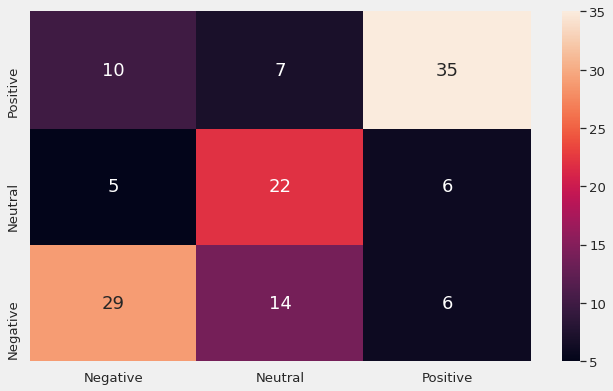

In [195]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [196]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [197]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [198]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4904233870967742
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [200]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.4626865671641791
Precision Score:  0.4626865671641791
Recall Score:  0.4626865671641791
F1 Score:  0.4626865671641791


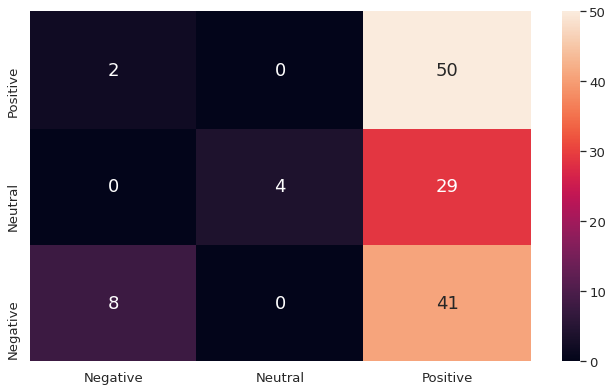

In [201]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [202]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [203]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.6194029850746269
Precision Score:  0.6194029850746269
Recall Score:  0.6194029850746269
F1 Score:  0.6194029850746269


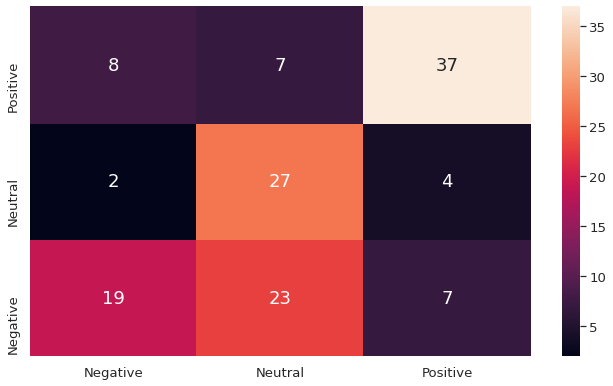

In [204]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [205]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [206]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=600, max_depth=14, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, max_depth=14, criterion=gini, score=0.476, total=   1.2s
[CV] n_estimators=600, max_depth=14, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=600, max_depth=14, criterion=gini, score=0.460, total=   1.1s
[CV] n_estimators=600, max_depth=14, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=600, max_depth=14, criterion=gini, score=0.500, total=   1.1s
[CV] n_estimators=600, max_depth=14, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=600, max_depth=14, criterion=gini, score=0.548, total=   1.1s
[CV] n_estimators=600, max_depth=14, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=600, max_depth=14, criterion=gini, score=0.532, total=   1.1s
[CV] n_estimators=600, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=600, max_depth=11, criterion=gini, score=0.492, total=   1.0s
[CV] n_estimators=600, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=600, max_depth=11, criterion=gini, score=0.508, total=   1.0s
[CV] n_estimators=600, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    7.6s remaining:    0.0s


[CV]  n_estimators=600, max_depth=11, criterion=gini, score=0.500, total=   1.0s
[CV] n_estimators=600, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.6s remaining:    0.0s


[CV]  n_estimators=600, max_depth=11, criterion=gini, score=0.484, total=   1.0s
[CV] n_estimators=600, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    9.6s remaining:    0.0s


[CV]  n_estimators=600, max_depth=11, criterion=gini, score=0.484, total=   1.1s
[CV] n_estimators=1200, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=4, criterion=gini, score=0.444, total=   1.8s
[CV] n_estimators=1200, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=4, criterion=gini, score=0.492, total=   1.8s
[CV] n_estimators=1200, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=4, criterion=gini, score=0.435, total=   1.8s
[CV] n_estimators=1200, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=4, criterion=gini, score=0.435, total=   1.8s
[CV] n_estimators=1200, max_depth=4, criterion=gini ..................
[CV]  n_estimators=1200, max_depth=4, criterion=gini, score=0.419, total=   1.8s
[CV] n_estimators=700, max_depth=7, criterion=gini ...................
[CV]  n_estimators=700, max_depth=7, criterion=gini, score=0.460, total=   1.2s
[CV] n_e

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.1min finished


0.5130568356374808
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 19, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [207]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.5597014925373134
Precision Score:  0.5597014925373134
Recall Score:  0.5597014925373134
F1 Score:  0.5597014925373134


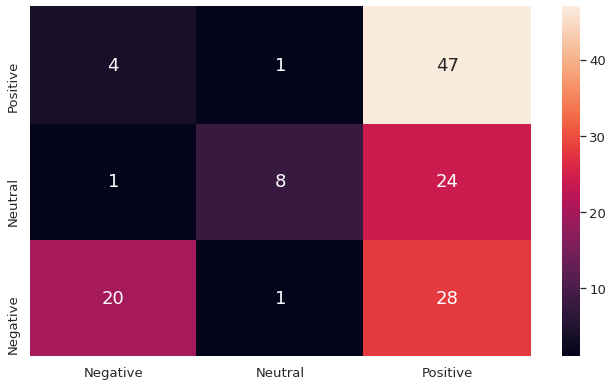

In [208]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [209]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.5895522388059702
Precision Score:  0.5895522388059702
Recall Score:  0.5895522388059702
F1 Score:  0.5895522388059702


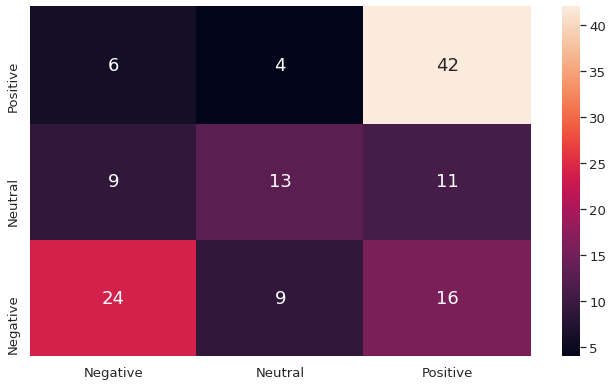

In [210]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [211]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [212]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.5003024193548387
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [213]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.5895522388059702
Precision Score:  0.5895522388059702
Recall Score:  0.5895522388059702
F1 Score:  0.5895522388059702


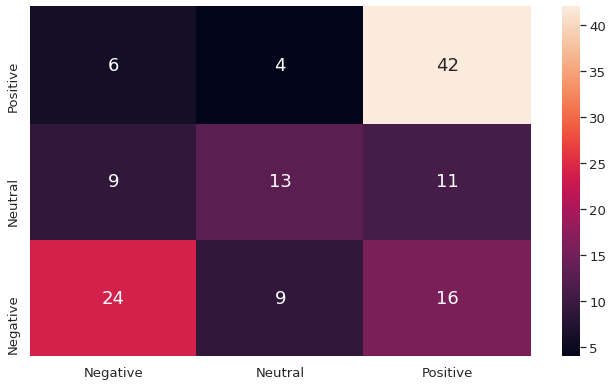

In [214]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

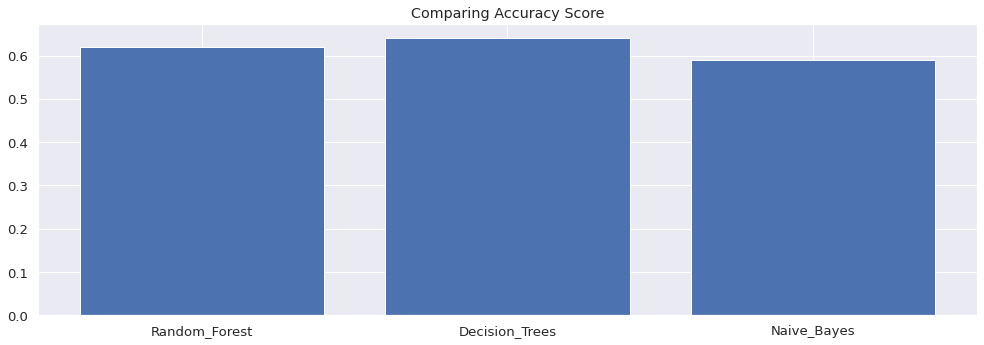

In [216]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

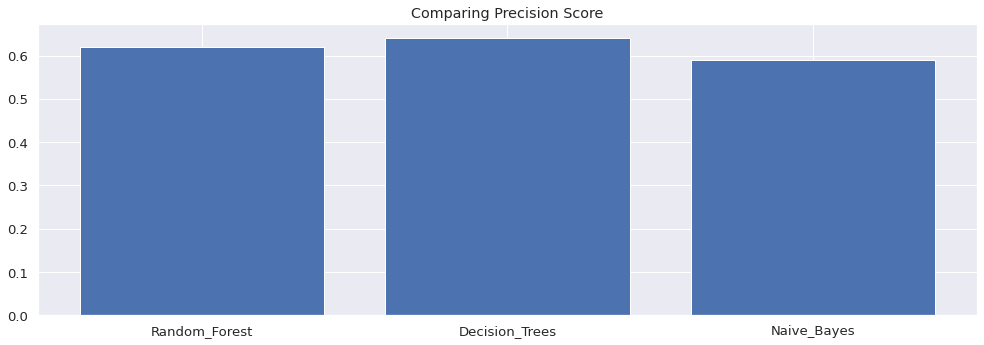

In [217]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

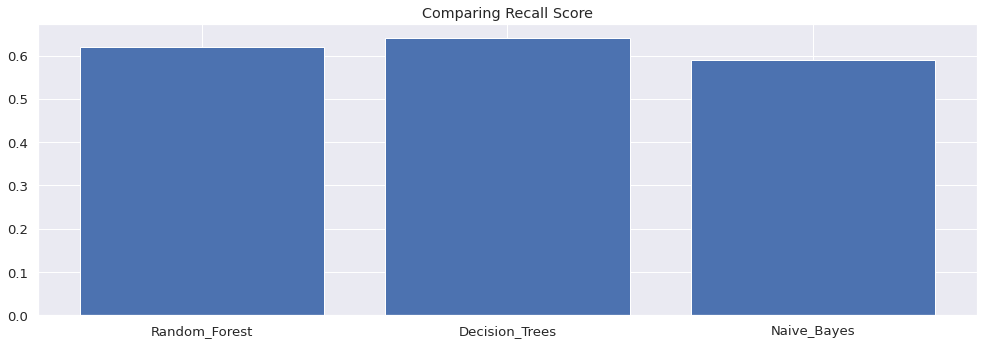

In [218]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

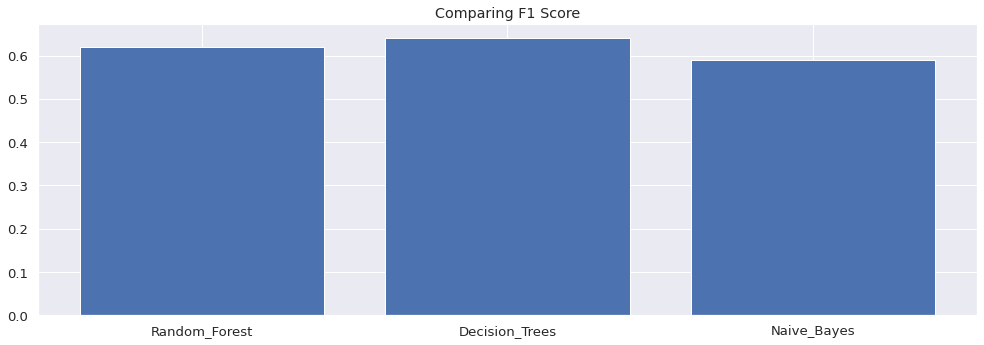

In [219]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()